<a href="https://colab.research.google.com/github/harsh-agar/E-Net/blob/master/active_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm_notebook

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    filenames = []
    # loop over all 42 classes
    for c in tqdm_notebook(range(0,43)):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        prefix = rootpath + '/' 
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        # gtReader.next() # skip header
        next(gtReader)
        # loop over all images in current annotations file
        for row in gtReader:
            filenames.append(row[0])
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels, filenames


In [12]:
images1, labels1, filenames1 = readTrafficSigns('/content/gdrive/My Drive/Office/GTSRB')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [31]:
folder_path = '/content/gdrive/My Drive/Office/GTSRB_png'
folder_to_save = folder_path + '/' + str(format(int(labels[0]), '05d'))
folder_to_save +'/'+filenames[0].split('.')[0]+'.png'

'/content/gdrive/My Drive/Office/GTSRB_png/00000/00000_00000.png'

In [33]:
import os
folder_path = '/content/gdrive/My Drive/Office/GTSRB_png'
for i in tqdm_notebook(range(len(labels))):
  folder_to_save = folder_path + '/' + str(format(int(labels[i]), '05d'))
  if not os.path.exists(folder_to_save):
    os.makedirs(folder_to_save)
  plt.imsave(folder_to_save +'/'+filenames[i].split('.')[0]+'.png', images[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
import time
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    start = time.time()
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    c = 0
    for d in tqdm_notebook(directories):
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.lower().endswith(".ppm") or f.lower().endswith(".jpg")
                      or f.lower().endswith(".png") or f.lower().endswith(".jpeg") or f.lower().endswith(".heic")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        
        for f in file_names:
            try:
              images.append(plt.imread(f)) # the 1th column is the filename
              labels.append(int(d))
            except:
              print(1)
            # print(c)
    end = time.time()
    print(end - start)
    return images, labels

In [11]:
images, labels = load_data('/content/gdrive/My Drive/Office/GTSRB_png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



6675.266195774078


In [15]:
import os
folder_path_train = '/content/gdrive/My Drive/Office/GTSRB_png_split/train'
folder_path_extra = '/content/gdrive/My Drive/Office/GTSRB_png_split/extra'
for i in tqdm_notebook(range(len(labels1))):
  if (i%3==0):
    folder_to_save = folder_path_train + '/' + str(format(int(labels1[i]), '05d'))
    if not os.path.exists(folder_to_save):
      os.makedirs(folder_to_save)
    plt.imsave(folder_to_save +'/'+filenames1[i].split('.')[0]+'.png', images1[i])
  else:
    folder_to_save = folder_path_extra + '/' + str(format(int(labels1[i]), '05d'))
    if not os.path.exists(folder_to_save):
      os.makedirs(folder_to_save)
    plt.imsave(folder_to_save +'/'+filenames1[i].split('.')[0]+'.png', images1[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [28]:
import os
labels_train = []
images_train = []
labels_val = []
images_val = []
labels_extra = []
images_extra = []
labels_train_extra = []
images_train_extra = []
folder_path_train = '/content/gdrive/My Drive/Office/GTSRB_png_split/train'
folder_path_extra = '/content/gdrive/My Drive/Office/GTSRB_png_split/extra'
for i in tqdm_notebook(range(len(labels1))):
  if (i%5==0):
    labels_val.append(labels1[i])
    images_val.append(images1[i])
  else:
    labels_train_extra.append(labels1[i])
    images_train_extra.append(images1[i])

for i in tqdm_notebook(range(len(labels_train_extra))):
  if (i%3==0):
    labels_train.append(labels1[i])
    images_train.append(images1[i])
  else:
    labels_extra.append(labels1[i])
    images_extra.append(images1[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [68]:
import cv2
images_train_48 = []
images_val_48 = []
images_extra_48 = []
for i in tqdm_notebook(images_train):
  images_train_48.append(cv2.resize(i, (48, 48)))

for i in tqdm_notebook(images_val):
  images_val_48.append(cv2.resize(i, (48, 48)))

for i in tqdm_notebook(images_extra):
  images_extra_48.append(cv2.resize(i, (48, 48)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [69]:
(np.array(images_val_48)).shape

(5328, 48, 48, 3)

In [75]:
train_data_dict = {}
train_data_dict['images_train_48'] = np.array(images_train_48)
train_data_dict['labels_train'] = np.array(labels_train)
train_data_dict['images_val_48'] = np.array(images_val_48)
train_data_dict['labels_val'] = np.array(labels_val)
train_data_dict['images_extra_48'] = np.array(images_extra_48)
train_data_dict['labels_extra'] = np.array(labels_extra)

In [77]:
images_train_48_np = train_data_dict['images_train_48']
images_val_48_np = train_data_dict['images_val_48']
images_extra_48_np = train_data_dict['images_extra_48']

labels_train_np = train_data_dict['labels_train']
labels_val_np = train_data_dict['labels_val']
labels_extra_np = train_data_dict['labels_extra']

In [76]:
import pickle
with open('/content/gdrive/My Drive/Office/GTSRB_training_val.h5', 'wb') as h:
  pickle.dump(train_data_dict, h)

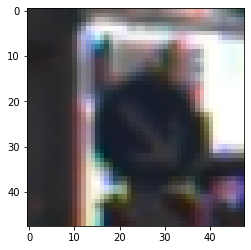

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im_find = cv2.resize(train_data_dict['images_extra_48'][500], (48, 48))

plt.imshow(im_find)
plt.show()

In [83]:
labels_train_copied_class_np

array(['0', '0', '0', ..., '43', '43', '43'], dtype='<U2')

In [90]:
images_train_copied_class_np = images_train_48_np.copy()
labels_train_copied_class_np = labels_train_np.copy()
for i in range(165):
  labels_train_copied_class = np.append(labels_train_copied_class, 43)
  # images_train_copied_class = np.append(images_train_copied_class, im_find)
  images_train_copied_class = np.append(images_train_copied_class, im_find, axis= 0)

ValueError: ignored

In [84]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.ZeroPadding2D((1,1),input_shape=(48,48,3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2, 2)))

In [85]:
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_16 (ZeroPaddi (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
zero_padding2d_17 (ZeroPaddi (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
zero_padding2d_18 (ZeroPaddi (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
zero_padding2d_19 (ZeroPaddi (None, 27, 27, 64)       

In [88]:
from tensorflow.keras.optimizers import RMSprop, Adam

model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(images_train_copied_class, labels_train_copied_class, epochs=100, batch_size=128,
                    validation_data=(images_val_48_np, labels_val_np))

ValueError: ignored

In [89]:
images_train_copied_class.shape

(1147914,)